In [2]:
import seaborn as sns # visualization
import math as m 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\kimoa\Downloads\archive\Final Transactions.csv')
df

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,1754151,1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0,0
1754152,1754152,1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,1754153,1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


In [4]:
df = pd.read_csv(r"C:\Users\kimoa\Downloads\archive\Final Transactions.csv")
df.drop('Unnamed: 0',axis = 1,inplace = True)
print("Dataset size")
print(cl("Rows {} Columns {}".format(df.shape[0], df.shape[1]), attrs = ['bold'], color = 'black'))
df.head()

Dataset size
Rows 1754155 Columns 9


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [5]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
TRANSACTION_ID,int64
TX_DATETIME,object
CUSTOMER_ID,int64
TERMINAL_ID,int64
TX_AMOUNT,float64
TX_TIME_SECONDS,int64
TX_TIME_DAYS,int64
TX_FRAUD,int64
TX_FRAUD_SCENARIO,int64


In [6]:
df.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TRANSACTION_ID,1754155.0,0,0,0,8.770770e+05,5.063811e+05,0.0,438538.50,877077.00,1.315616e+06,1754154.0
TX_DATETIME,1754155.0,1635076,2023-04-03 12:10:19,6,0.000000e+00,0.000000e+00,0.0,0.00,0.00,0.000000e+00,0.0
CUSTOMER_ID,1754155.0,0,0,0,2.504011e+03,1.445987e+03,0.0,1252.00,2506.00,3.765000e+03,4999.0
TERMINAL_ID,1754155.0,0,0,0,4.996733e+03,2.886101e+03,0.0,2502.00,4994.00,7.495000e+03,9999.0
TX_AMOUNT,1754155.0,0,0,0,5.396820e+02,1.179711e+03,0.0,179.95,421.75,7.505950e+02,647837.5
TX_TIME_SECONDS,1754155.0,0,0,0,7.903234e+06,4.565172e+06,31.0,3940846.50,7902670.00,1.186566e+07,15811197.0
TX_TIME_DAYS,1754155.0,0,0,0,9.097260e+01,5.283709e+01,0.0,45.00,91.00,1.370000e+02,182.0
TX_FRAUD,1754155.0,0,0,0,1.345200e-01,3.412103e-01,0.0,0.00,0.00,0.000000e+00,1.0
TX_FRAUD_SCENARIO,1754155.0,0,0,0,1.449746e-01,3.874872e-01,0.0,0.00,0.00,0.000000e+00,3.0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB
None


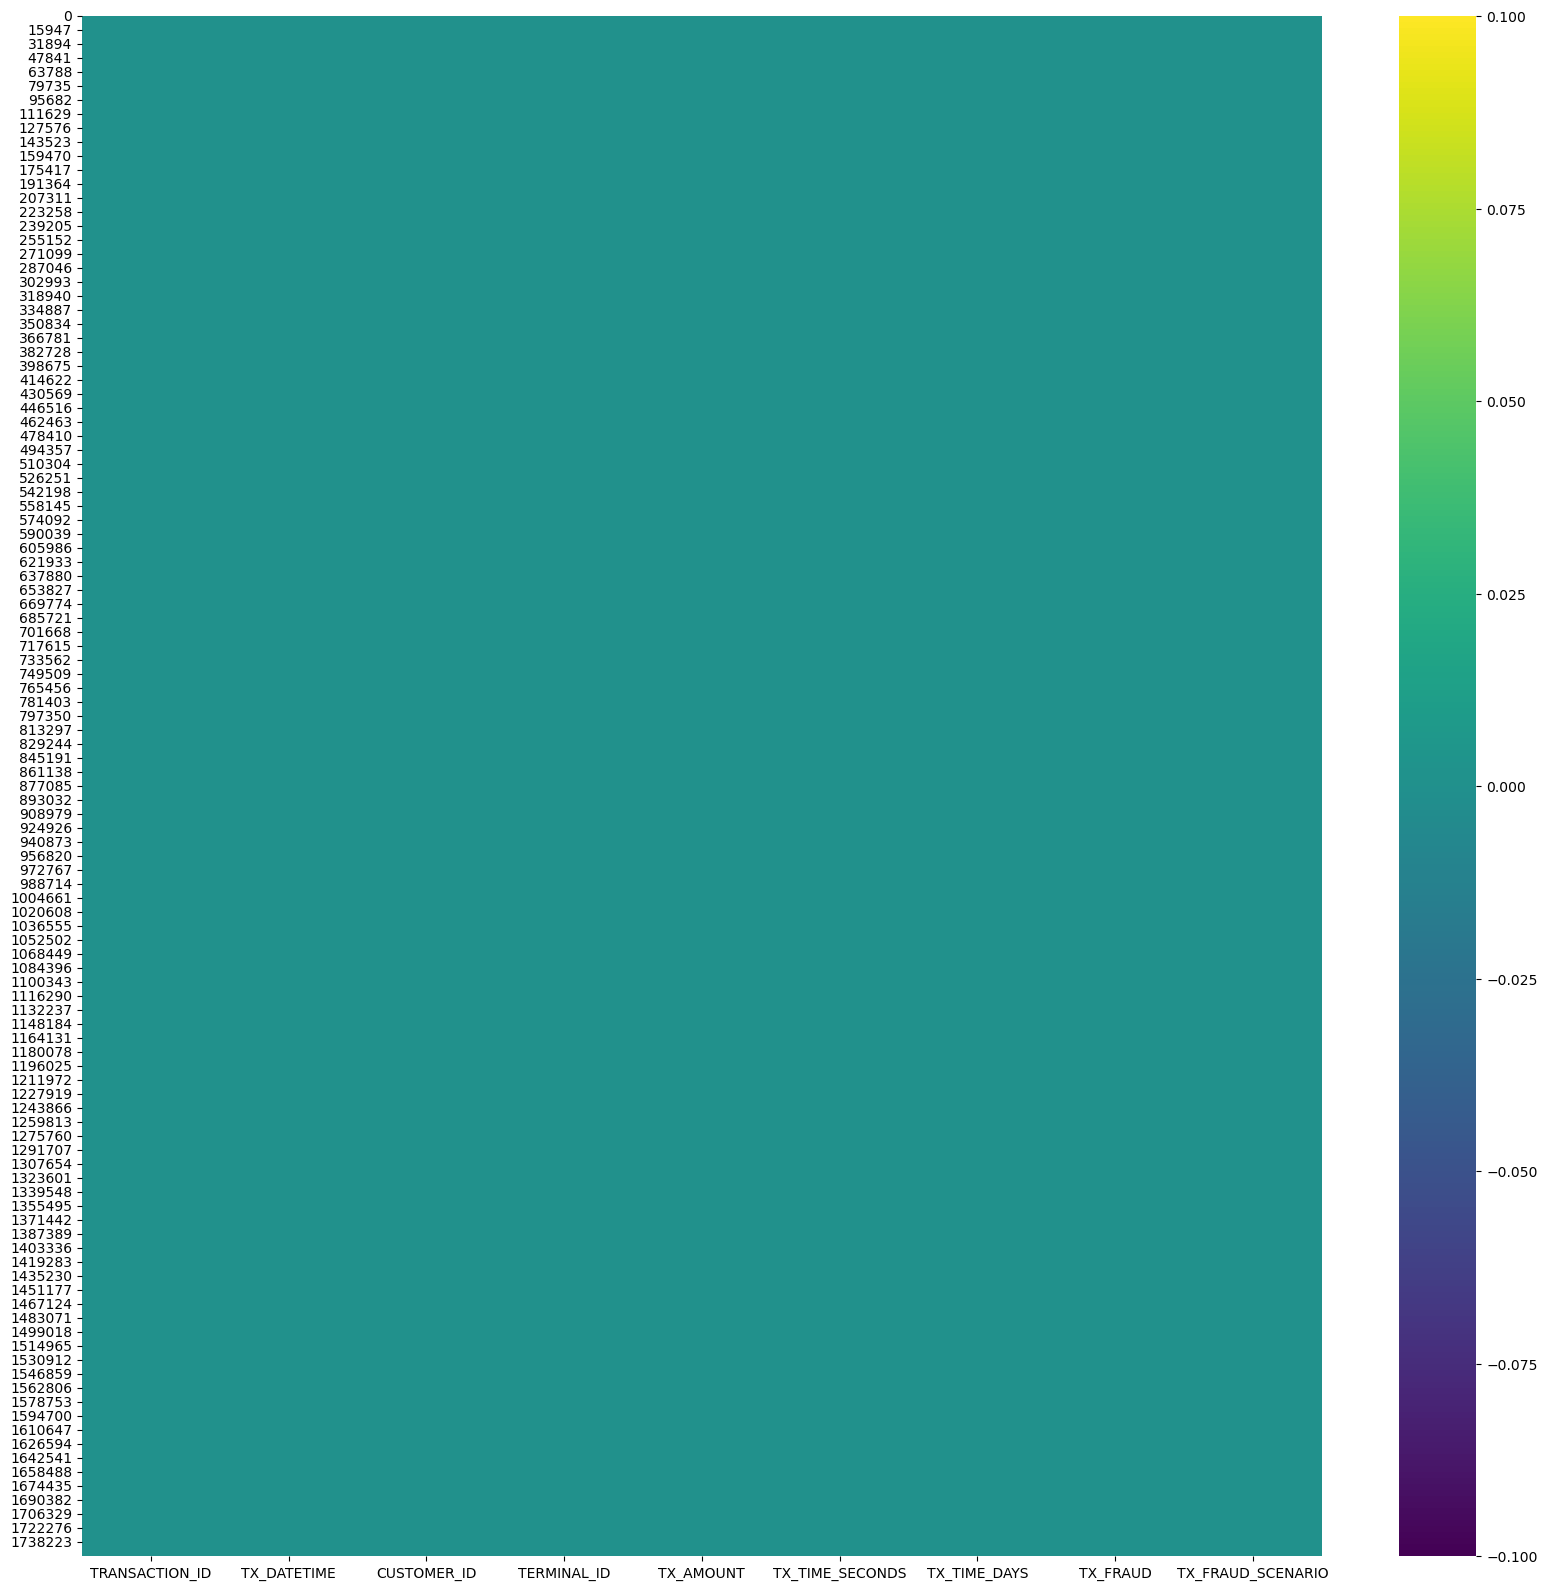

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [9]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
TRANSACTION_ID,0
TX_DATETIME,0
CUSTOMER_ID,0
TERMINAL_ID,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0


In [10]:
df.duplicated().sum()

0

In [11]:
d_df = df.drop(['TRANSACTION_ID','CUSTOMER_ID','TERMINAL_ID'],axis = 1)
d_df

,TX_DATETIME,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,2023-01-01 00:00:31,533.07,31,0,0,0
1,2023-01-01 00:02:10,808.56,130,0,0,0
2,2023-01-01 00:07:56,1442.94,476,0,1,1
3,2023-01-01 00:09:29,620.65,569,0,0,0
4,2023-01-01 00:10:34,490.66,634,0,0,0
...,...,...,...,...,...,...
1754150,2023-07-02 23:56:36,531.43,15810996,182,0,0
1754151,2023-07-02 23:57:38,10.40,15811058,182,0,0
1754152,2023-07-02 23:58:21,26.62,15811101,182,0,0
1754153,2023-07-02 23:59:52,550.43,15811192,182,0,0


In [12]:
pd.DataFrame(d_df.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
TX_DATETIME,0
TX_AMOUNT,0
TX_TIME_SECONDS,0
TX_TIME_DAYS,0
TX_FRAUD,0
TX_FRAUD_SCENARIO,0


In [13]:
d_df.duplicated().sum()

1

In [14]:
d_df.drop_duplicates(keep = "first",inplace = True)

In [17]:
from pandas_profiling import ProfileReport
Report = ProfileReport(d_df)
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
d_df['TX_DATETIME'] = pd.to_datetime(d_df['TX_DATETIME'],errors = 'coerce')

In [16]:
d_df['year'] = d_df['TX_DATETIME'].dt.year
d_df['Month'] = d_df['TX_DATETIME'].dt.month
d_df['day'] = d_df['TX_DATETIME'].dt.day


In [17]:
d_df.drop('year',axis = 1,inplace = True)
d_df

,TX_DATETIME,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,Month,day
0,2023-01-01 00:00:31,533.07,31,0,0,0,1,1
1,2023-01-01 00:02:10,808.56,130,0,0,0,1,1
2,2023-01-01 00:07:56,1442.94,476,0,1,1,1,1
3,2023-01-01 00:09:29,620.65,569,0,0,0,1,1
4,2023-01-01 00:10:34,490.66,634,0,0,0,1,1
...,...,...,...,...,...,...,...,...
1754150,2023-07-02 23:56:36,531.43,15810996,182,0,0,7,2
1754151,2023-07-02 23:57:38,10.40,15811058,182,0,0,7,2
1754152,2023-07-02 23:58:21,26.62,15811101,182,0,0,7,2
1754153,2023-07-02 23:59:52,550.43,15811192,182,0,0,7,2


In [18]:
d_df.drop('TX_DATETIME',axis = 1,inplace = True)

In [19]:
one_df = d_df[d_df['TX_FRAUD'] == 1]
len(one_df)

235969

In [20]:
d_df['TX_FRAUD'].value_counts() *100 / len(d_df)

0    86.547988
1    13.452012
Name: TX_FRAUD, dtype: float64

In [21]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754154 entries, 0 to 1754154
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TX_AMOUNT          float64
 1   TX_TIME_SECONDS    int64  
 2   TX_TIME_DAYS       int64  
 3   TX_FRAUD           int64  
 4   TX_FRAUD_SCENARIO  int64  
 5   Month              int64  
 6   day                int64  
dtypes: float64(1), int64(6)
memory usage: 107.1 MB


In [22]:
from datasist.structdata import detect_outliers



for col in d_df.columns:
    outliers = detect_outliers(d_df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))
    
for col in d_df.columns:
    outliers = detect_outliers(d_df,0,[col])
    col_median = d_df[col].median()
    d_df[col].iloc[outliers] = col_median

number of outliers in TX_AMOUNT :  27800
number of outliers in TX_TIME_SECONDS :  0
number of outliers in TX_TIME_DAYS :  0
number of outliers in TX_FRAUD :  235969
number of outliers in TX_FRAUD_SCENARIO :  235969
number of outliers in Month :  0
number of outliers in day :  0


In [23]:
x = d_df.drop('TX_FRAUD',axis = 1).values
y = d_df['TX_FRAUD'].values
x

array([[5.3307000e+02, 3.1000000e+01, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [8.0856000e+02, 1.3000000e+02, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.4429400e+03, 4.7600000e+02, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [2.6620000e+01, 1.5811101e+07, 1.8200000e+02, 0.0000000e+00,
        7.0000000e+00, 2.0000000e+00],
       [5.5043000e+02, 1.5811192e+07, 1.8200000e+02, 0.0000000e+00,
        7.0000000e+00, 2.0000000e+00],
       [2.1657000e+02, 1.5811197e+07, 1.8200000e+02, 0.0000000e+00,
        7.0000000e+00, 2.0000000e+00]])

x_train shape: (1227907, 6)  Rows 1227907 Columns 6
y_train shape: (1227907,) Rows 1227907 Columns 1
x_test shape: (526247, 6) Rows 526247 Columns 6
y_test shape: (526247,) Rows 526247 Columns 1
Counter({0: 1170538, 1: 57369})
Class=0, n=1170538 (95.33%)
Class=1, n=57369 (4.67%)


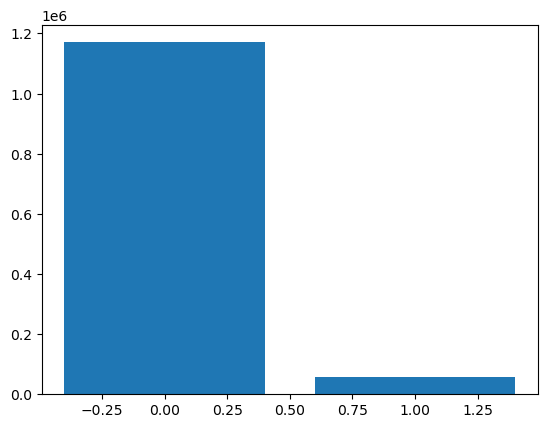

In [30]:
from sklearn.model_selection import train_test_split
from termcolor import colored as cl
from collections import Counter
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

print("x_train shape: {}  Rows {} Columns {}".format(x_train.shape,x_train.shape[0],x_train.shape[1]))
print("y_train shape: {} Rows {} Columns 1".format(y_train.shape,y_train.shape[0]))
print("x_test shape: {} Rows {} Columns {}".format(x_test.shape,x_test.shape[0],x_test.shape[1]))
print("y_test shape: {} Rows {} Columns 1".format(y_test.shape,y_test.shape[0]))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_text = scaler.transform(x_test)

counter = Counter(y_train)

print(counter)

for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.2f%%)' % (k, v, per))


plt.bar(counter.keys(), counter.values())
plt.show()

In [31]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
x_train, y_train = undersample.fit_resample(x_train, y_train)

Counter({1: 57369, 0: 49466})
Class=0, n=49466 (46.30%)
Class=1, n=57369 (53.70%)


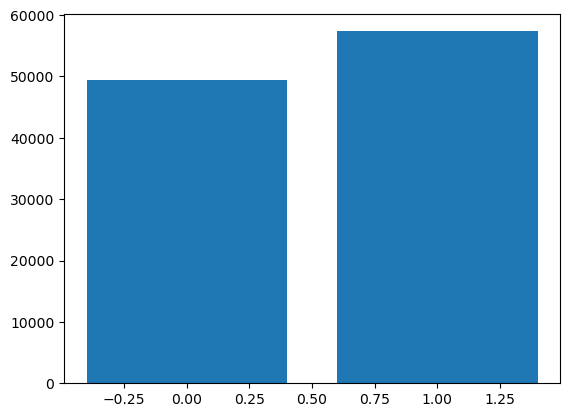

In [32]:

counter = Counter(y_train)

print(counter)

for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.2f%%)' % (k, v, per))


plt.bar(counter.keys(), counter.values())
plt.show()

In [33]:
from sklearn.utils import class_weight
sklearn_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes=np.unique(y_train),  y=y_train)
class_weights = dict(zip(np.unique(y_train), sklearn_weights))
class_weights

{0: 1.079883152064044, 1: 0.9311213373076052}

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
model = LogisticRegression(fit_intercept=True, max_iter=100000,class_weight=class_weights)
model.fit(x_train,y_train)
print('Training of the {} Score is {:.0%}:'.format(model,model.score(x_train, y_train)))
print('Test Score of the {} is {:.0%}:'.format(model,model.score(x_test, y_test)))  
y_pred = model.predict(x_test) 
print(('Accuracy of the {} is {:.0%}'.format(model,accuracy_score(y_test, y_pred))))
print(cl('F1 score of the {} is {:.0%}'.format(model,f1_score(y_test, y_pred)), attrs = ['bold']))

Training of the LogisticRegression(class_weight={0: 1.079883152064044, 1: 0.9311213373076052},
                   max_iter=100000) Score is 74%:
Test Score of the LogisticRegression(class_weight={0: 1.079883152064044, 1: 0.9311213373076052},
                   max_iter=100000) is 65%:
Accuracy of the LogisticRegression(class_weight={0: 1.079883152064044, 1: 0.9311213373076052},
                   max_iter=100000) is 65%
F1 score of the LogisticRegression(class_weight={0: 1.079883152064044, 1: 0.9311213373076052},
                   max_iter=100000) is 17%


In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))  
y_pred = model.predict(x_test) 
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8404268264145646
0.9794089087443729
0.9794089087443729
0.77157553016569


In [36]:
print('score of train :',model.score(x_train, y_train))
print('score of test :',model.score(x_test, y_test))  

score of train : 0.8404268264145646
score of test : 0.9794089087443729


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    501750
           1       0.80      0.75      0.77     24497

    accuracy                           0.98    526247
   macro avg       0.89      0.87      0.88    526247
weighted avg       0.98      0.98      0.98    526247

